In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read of the dataset and explore the datatypes


In [2]:
df = pd.read_csv('archive.zip')

In [3]:
df

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0
...,...,...,...,...,...,...,...,...,...,...,...
5801,Fine Wine,MOVIE,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.9,39.0
5802,Edis Starlight,MOVIE,2021,NaN,74,"['music', 'documentation']",[],NaN,NaN,NaN,NaN
5803,Clash,MOVIE,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",NaN,tt14620732,6.5,32.0
5804,Shadow Parties,MOVIE,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0


In [4]:
#Let's see some info for our dataset to see if we should drop any null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 5805 non-null   object 
 1   type                  5806 non-null   object 
 2   release_year          5806 non-null   int64  
 3   age_certification     3196 non-null   object 
 4   runtime               5806 non-null   int64  
 5   genres                5806 non-null   object 
 6   production_countries  5806 non-null   object 
 7   seasons               2047 non-null   float64
 8   imdb_id               5362 non-null   object 
 9   imdb_score            5283 non-null   float64
 10  imdb_votes            5267 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 499.1+ KB



As we see there are not many null values or at least that would affect the analysis, so I propose to keep the dataset as it is.

#####

In [5]:
df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes
count,5806.000000,5806.000000,2047.000000,5283.000000,5.267000e+03
mean,2016.013434,77.643989,2.165608,6.533447,2.340719e+04
std,7.324883,39.474160,2.636207,1.160932,8.713432e+04
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00
25%,2015.000000,44.000000,1.000000,5.800000,5.210000e+02
50%,2018.000000,84.000000,1.000000,6.600000,2.279000e+03
75%,2020.000000,105.000000,2.000000,7.400000,1.014400e+04
max,2022.000000,251.000000,42.000000,9.600000,2.268288e+06


### Top rated Movies and Shows



I will use min-max normalization in order to bring all values of imdb_score into a consistent range so that they can be combined with imdb_votes and compared more easily. Here's how it works:


In [6]:
# First we create a new column for weighted_score, where the number of votes plays a significant role.
# We want to give more importance to items with more reviews.
df["weighted_score"] = df["imdb_score"] * df["imdb_votes"]

# Then we create the normalized score using min-max scaling.
# Min-max scaling transforms the values to a range between 0 and 100, making them more interpretable.
# It scales the values based on the minimum and maximum values of the original weighted_score column.
# This ensures that the scores are comparable and fall within a consistent range.
df["normalized_weighted_score"] = (df["weighted_score"] - df["weighted_score"].min()) \
                                  / (df["weighted_score"].max() - df["weighted_score"].min()) * 100


df.head(10)

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,weighted_score,normalized_weighted_score
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,NaN,NaN
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,6600342.6,33.066232
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,4353191.4,21.808475
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,3139352.0,15.727394
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,3174730.2,15.904631
5,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,72895.0,641476.0,3.213558
6,Dirty Harry,MOVIE,1971,R,102,"['thriller', 'crime', 'action']",['US'],NaN,tt0066999,7.7,153463.0,1181665.1,5.919793
7,My Fair Lady,MOVIE,1964,G,170,"['drama', 'music', 'romance', 'family']",['US'],NaN,tt0058385,7.8,94121.0,734143.8,3.677805
8,The Blue Lagoon,MOVIE,1980,R,104,"['romance', 'drama']",['US'],NaN,tt0080453,5.8,69053.0,400507.4,2.006356
9,Bonnie and Clyde,MOVIE,1967,R,110,"['drama', 'crime', 'action']",['US'],NaN,tt0061418,7.7,111189.0,856155.3,4.289057


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      5805 non-null   object 
 1   type                       5806 non-null   object 
 2   release_year               5806 non-null   int64  
 3   age_certification          3196 non-null   object 
 4   runtime                    5806 non-null   int64  
 5   genres                     5806 non-null   object 
 6   production_countries       5806 non-null   object 
 7   seasons                    2047 non-null   float64
 8   imdb_id                    5362 non-null   object 
 9   imdb_score                 5283 non-null   float64
 10  imdb_votes                 5267 non-null   float64
 11  weighted_score             5267 non-null   float64
 12  normalized_weighted_score  5267 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage:

### Below we can see the top 100 rated movies and tv-shows based on the normalized weighted score and a plot of them.

In the diagramm I have kept only the top 30 for better visual results.

In [8]:
pd.set_option('display.max_rows', None)

top_100_rated_movies = df[df['type'] == 'MOVIE'].sort_values('normalized_weighted_score',ascending = False).head(100)
top_100_rated_movies[['title','imdb_score','normalized_weighted_score']].reset_index()

,index,title,imdb_score,normalized_weighted_score
0,260,Inception,8.8,100.000000
1,108,Forrest Gump,8.8,87.934104
2,706,Django Unchained,8.4,61.973068
3,111,Saving Private Ryan,8.6,57.992092
4,1,Taxi Driver,8.3,33.066232
5,52,Full Metal Jacket,8.3,30.075874
6,927,The Imitation Game,8.0,30.004696
7,262,How to Train Your Dragon,8.1,29.205513
8,727,Silver Linings Playbook,7.7,26.905498
9,276,The Social Network,7.8,26.622080


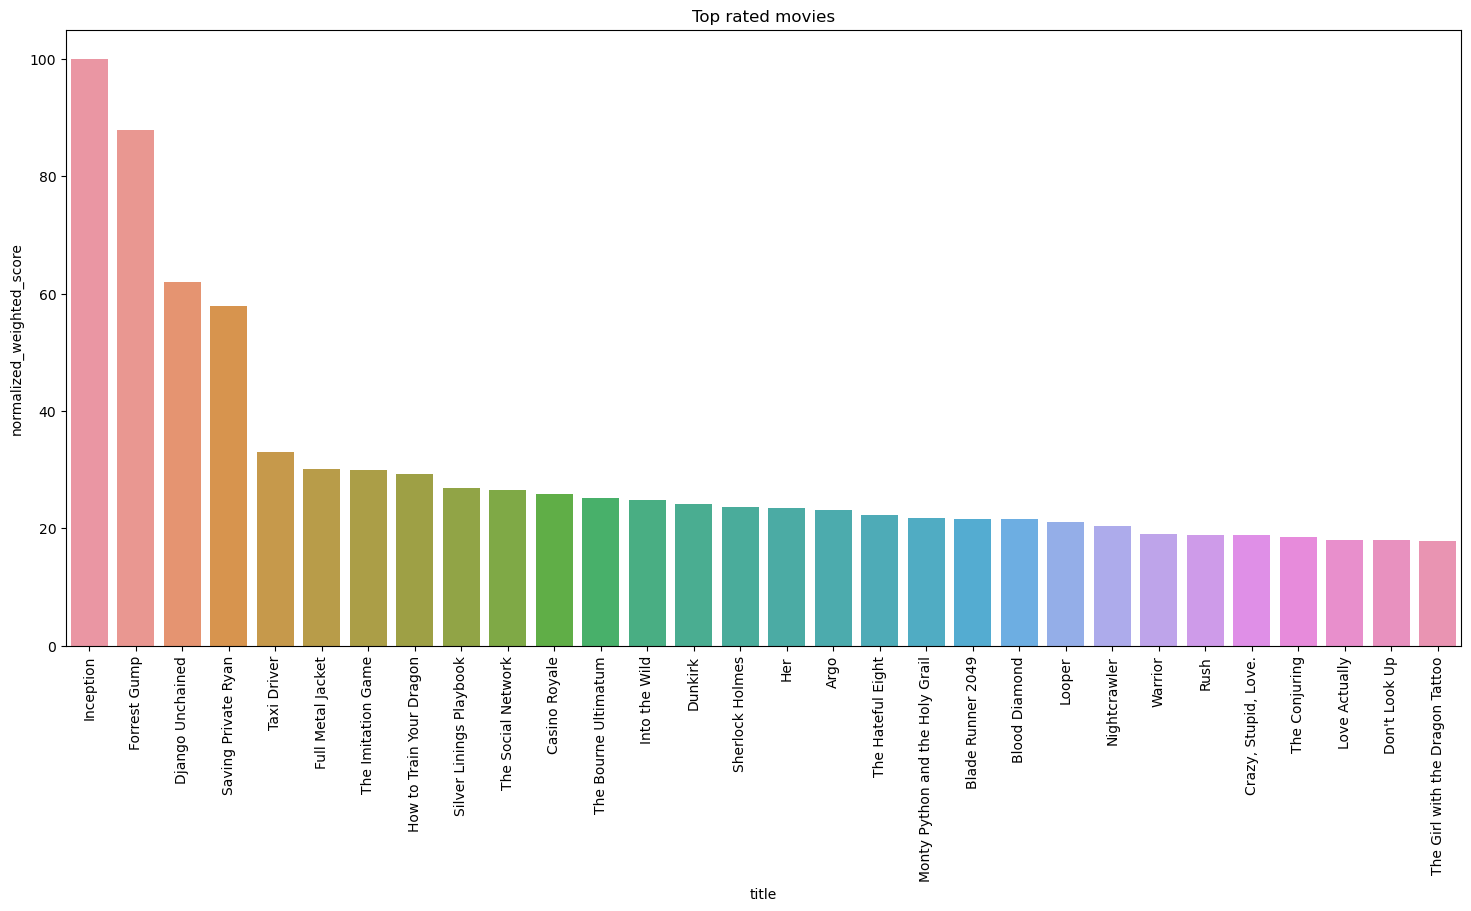

In [9]:
plt.figure(figsize=(18,8))
sns.barplot(x='title', y='normalized_weighted_score', data=top_100_rated_movies.head(30)).set_title('Top rated movies')
plt.xticks(rotation=90)

plt.show()

In [10]:
top_100_rated_shows = df[df['type'] == 'SHOW'].sort_values('normalized_weighted_score',ascending = False).head(100)
top_100_rated_shows[['title','imdb_score','normalized_weighted_score']].reset_index()

,index,title,imdb_score,normalized_weighted_score
0,243,Breaking Bad,9.5,82.226057
1,1219,Stranger Things,8.7,43.109562
2,244,The Walking Dead,8.2,38.825900
3,704,Black Mirror,8.8,22.729707
4,940,House of Cards,8.7,21.534986
5,916,Peaky Blinders,8.8,21.403992
6,3186,The Witcher,8.2,19.141215
7,1844,Money Heist,8.3,18.744606
8,253,Supernatural,8.5,18.252727
9,1217,Better Call Saul,8.8,17.851265


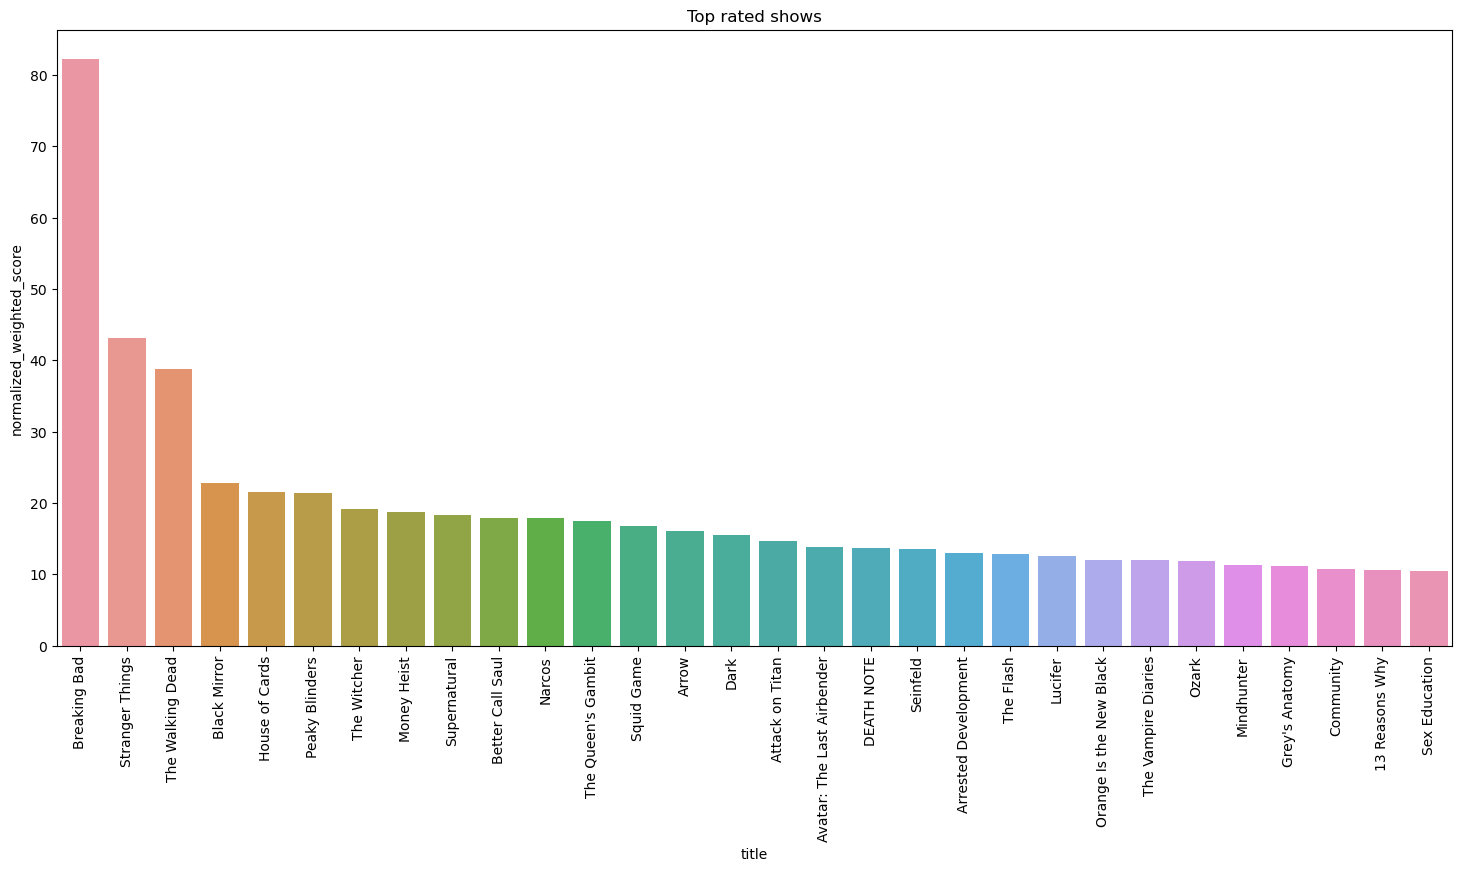

In [11]:
plt.figure(figsize=(18,8))
sns.barplot(x='title', y='normalized_weighted_score', data=top_100_rated_shows.head(30)).set_title('Top rated shows')
plt.xticks(rotation=90)

plt.show()

### Release year distribution for top rated movies and shows

<Axes: title={'center': 'Top rated movies year distribution'}, xlabel='release_year'>

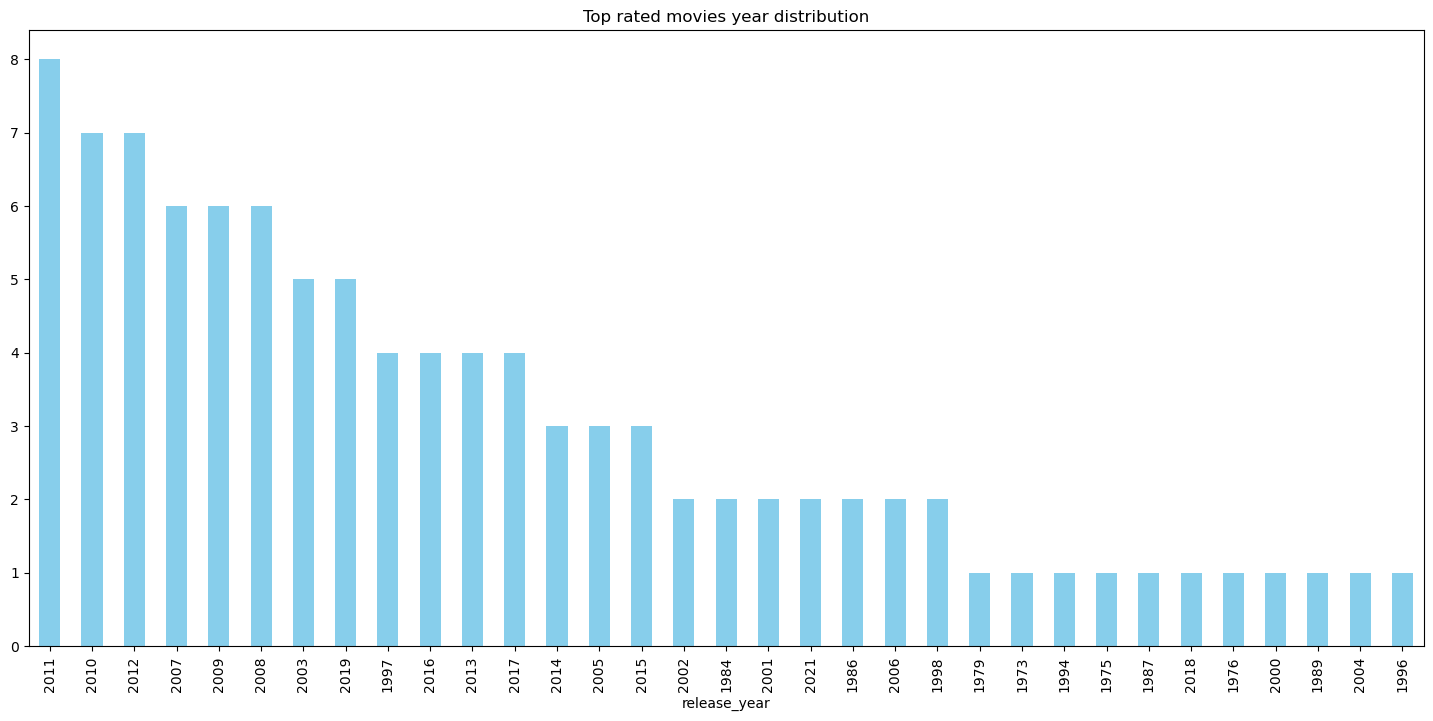

In [12]:
top_100_rated_movies['release_year'].value_counts().plot.bar(title = 'Top rated movies year distribution',figsize=(18,8),color='skyblue')

<Axes: title={'center': 'Top rated shows year distribution'}, xlabel='release_year'>

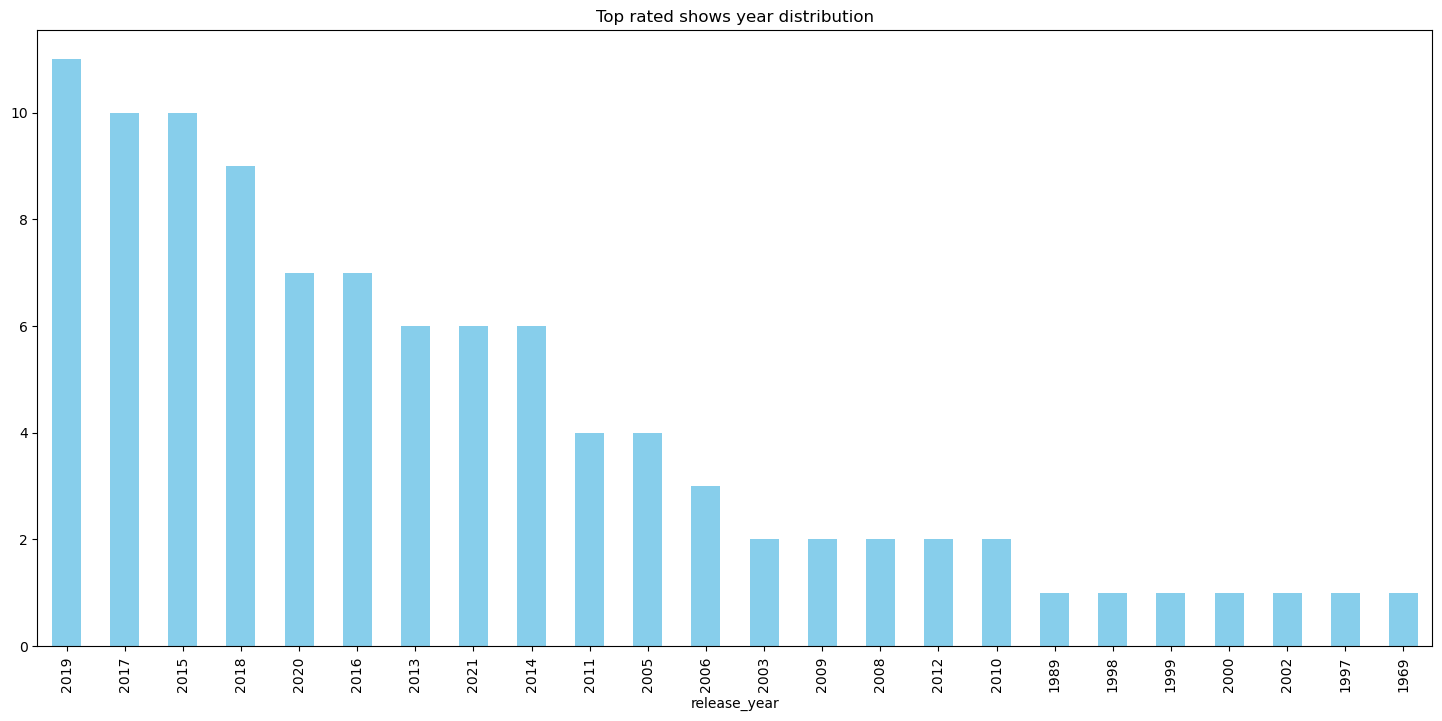

In [13]:
top_100_rated_shows['release_year'].value_counts().plot.bar(title = 'Top rated shows year distribution',figsize=(18,8),color='skyblue')

### Most common genres

In [14]:
#convert to list type
from ast import literal_eval

top_100_rated_movies['genres'] = top_100_rated_movies['genres'].apply(literal_eval)
top_100_rated_shows['genres'] = top_100_rated_shows['genres'].apply(literal_eval)

<Axes: title={'center': 'Most common movie genres'}, xlabel='genres', ylabel='Number of movies'>

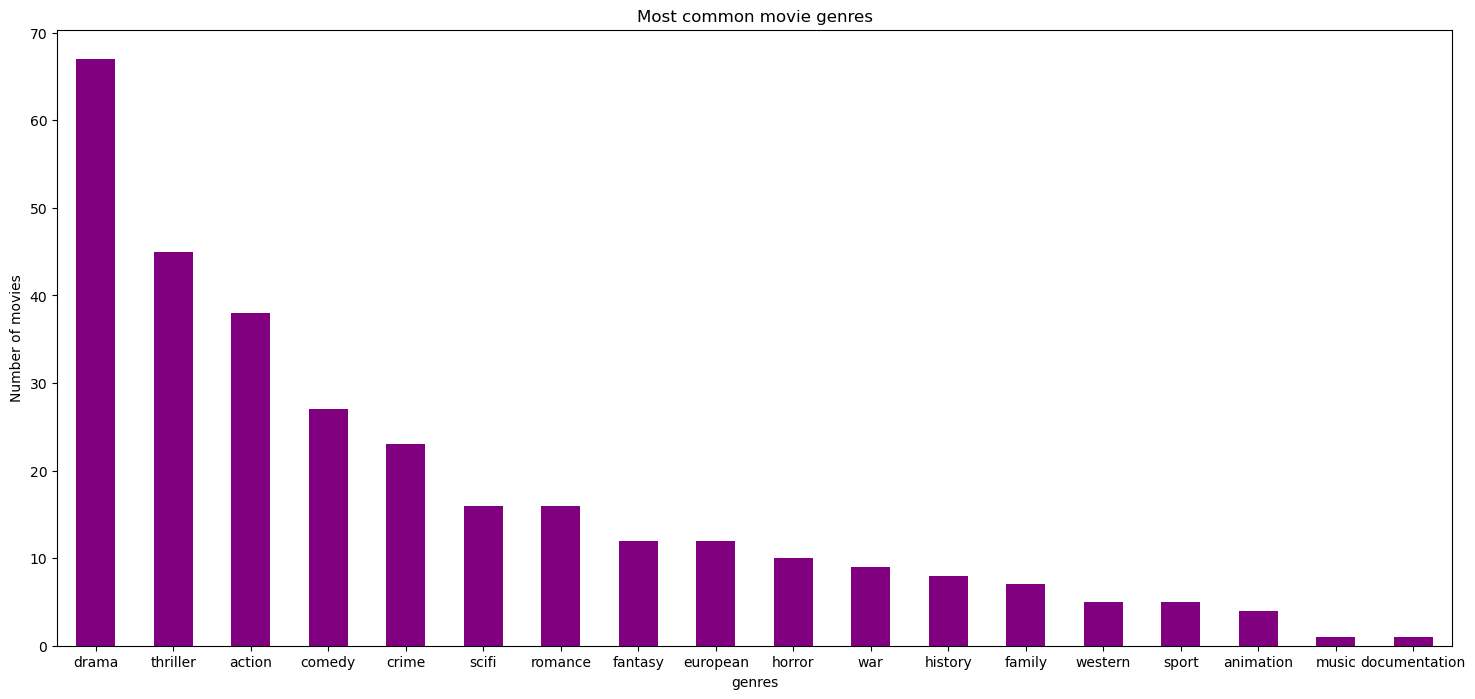

In [27]:
top_100_rated_movies['genres'].explode().value_counts().plot(kind='bar',ylabel ='Number of movies',figsize=(18,8),rot =360,title = 'Most common movie genres',color = 'purple')

<Axes: title={'center': 'Most common show genres'}, xlabel='genres', ylabel='Number of shows'>

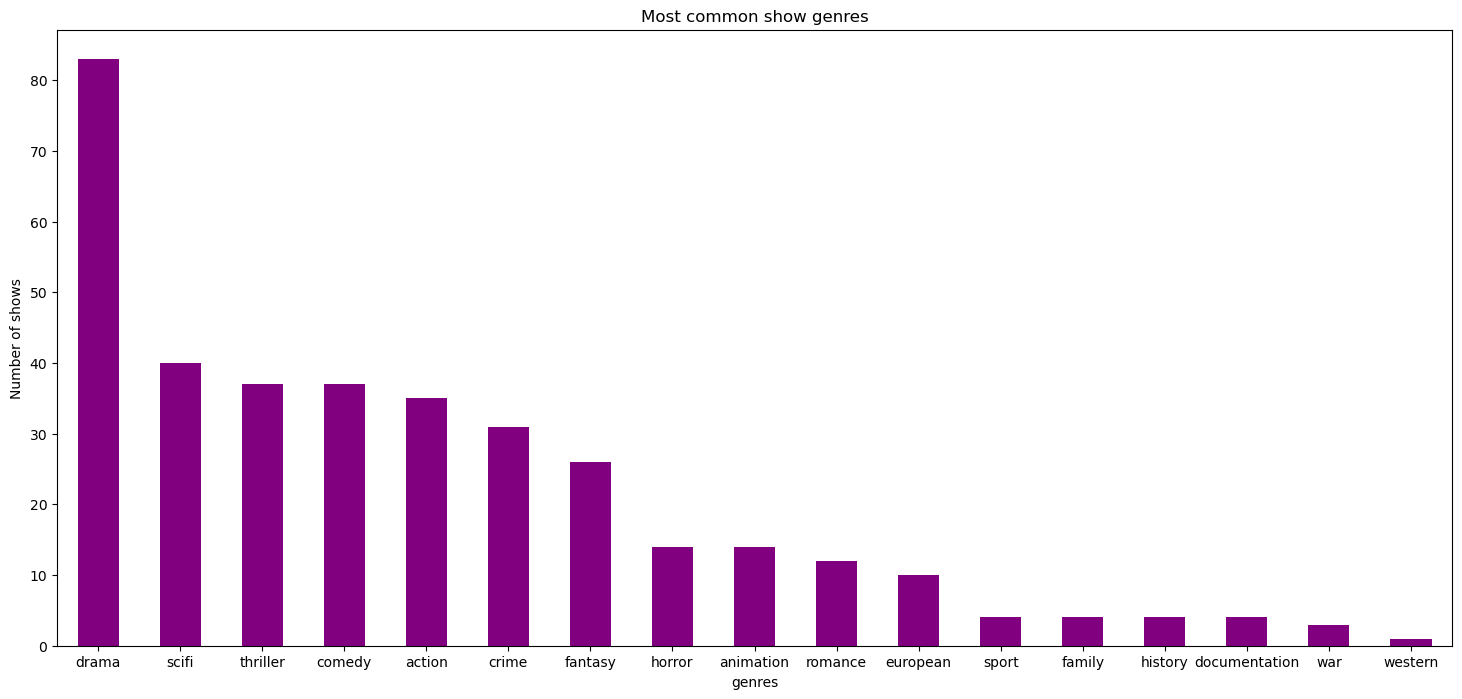

In [28]:
top_100_rated_shows['genres'].explode().value_counts().plot(kind='bar',ylabel ='Number of shows',figsize=(18,8),rot =360,title = 'Most common show genres',color = 'purple')

### Average duration for movies and shows

<Axes: xlabel='type'>

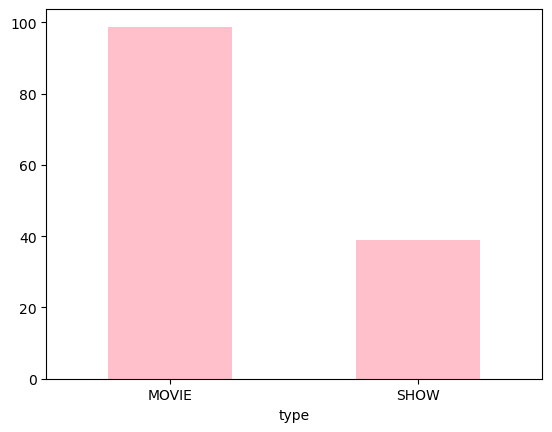

In [21]:
df.groupby('type')['runtime'].mean().plot(kind='bar',color = 'pink',rot =360)

### How many seasons have the most popular shows

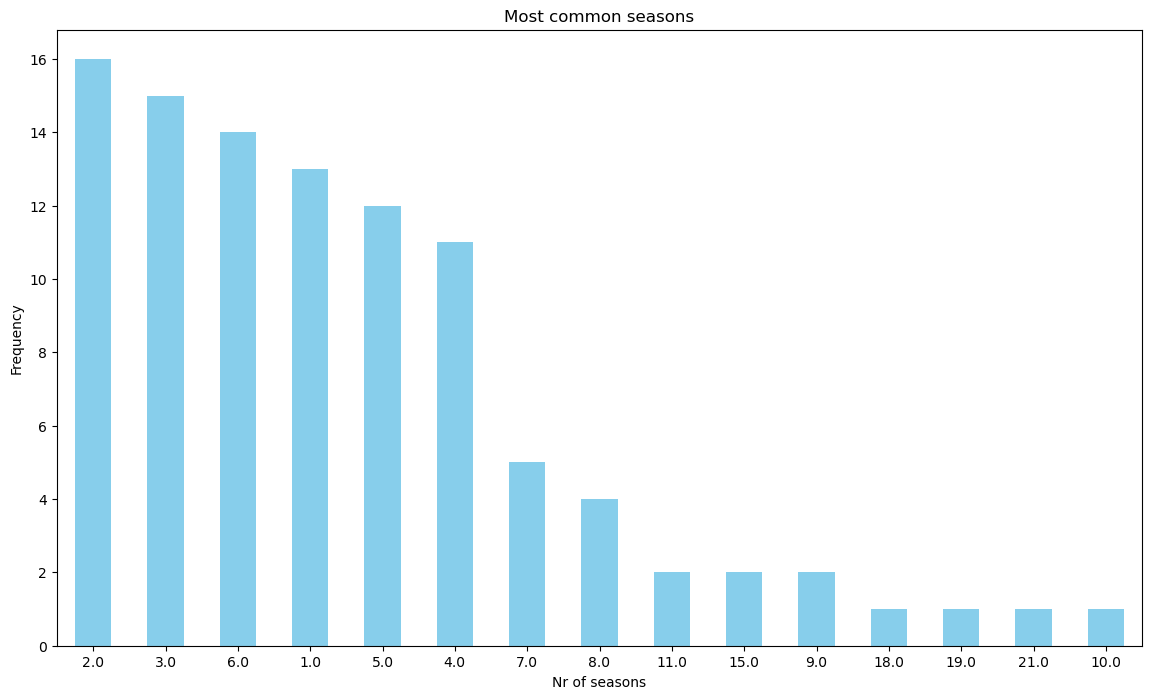

In [22]:
ax = top_100_rated_shows['seasons'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Most common seasons", color='skyblue',rot =360)
ax.set_xlabel("Nr of seasons")
ax.set_ylabel("Frequency")
plt.show()

### Age certification

Before we go to the analysis let's explain the meaning for each age certification category:
##### Tv shows
TV-14 (Parents Strongly Cautioned) - This program contains some material that many parents would find unsuitable for children under 14 years of age
<br>
TV-MA (Mature Audiences Only): This program is specifically designed to be viewed by adults or children 17+
<br>
TV-PG (Parental Guidance Suggested): This program contains material that parents may find unsuitable for younger children
<br>
TV-Y7 (Directed to Older Children): This program is designed for children age 7 and above
##### Movies
PG (Parental Guidance Suggested): Some Material May Not Be Suitable for Children
<br>
PG-13 (Parental Guidance 13): Some Material May Be Inappropriate for Children Under 13
<br>
R (Restricted): Under 17 Requires Accompanying Parent or Adult Guardian

<Axes: title={'center': 'TV-Shows'}, xlabel='age_certification'>

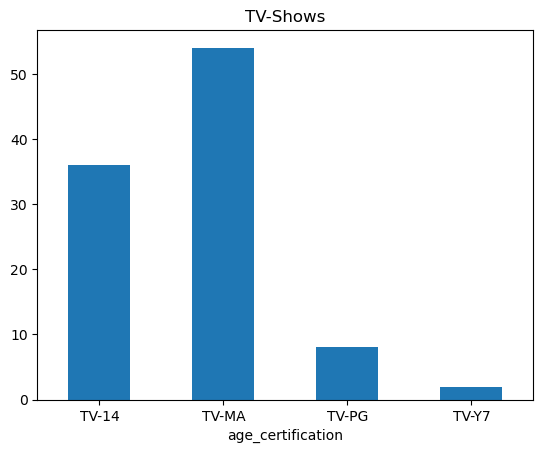

In [23]:
top_100_rated_shows.groupby('age_certification')['age_certification'].count().plot.bar(title = 'TV-Shows',rot = 360)

<Axes: title={'center': 'Movies'}, xlabel='age_certification'>

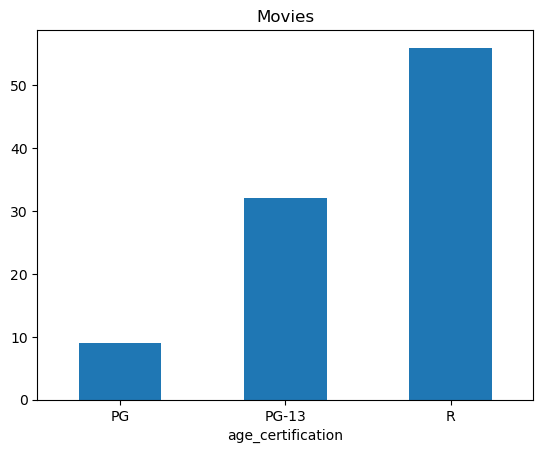

In [24]:
top_100_rated_movies.groupby('age_certification')['age_certification'].count().plot.bar(title = 'Movies',rot = 360)